<a href="https://colab.research.google.com/github/ruck-45/mcdonals_market_segmentation/blob/main/jupyter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#!pip install --user prince


In [ ]:
data = pd.read_csv('/content/mcdonalds.csv')

In [ ]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


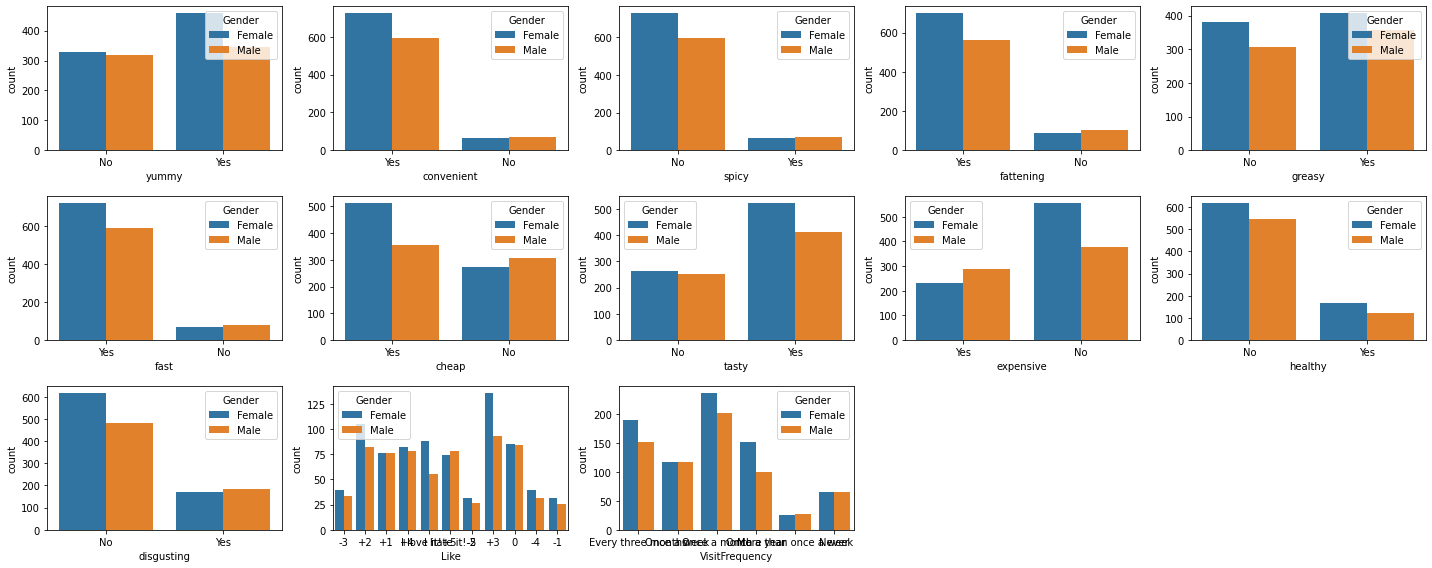

In [ ]:
n=0
plt.figure(1 , figsize = (20 , 8))
for i in  ['yummy','convenient',	'spicy',	'fattening',	'greasy',	'fast',	'cheap',	'tasty',	'expensive',	'healthy'	,'disgusting','Like',	'VisitFrequency']:
  n+=1
  plt.subplot(3 , 5 , n)
  plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
  plt.tight_layout()
  sns.countplot(x=i,hue='Gender',data=data)
plt.show()
# From plots we can infer :
# 1) More female thinks that it food is yummy than men
# 2) MOre female thinks that food is convenient
# 3) MOre female thinks that food is non spicy
# 4) MOre female thinks that food is fattening
# 5) same number of men as well as women consider food as Greasy
# 6) MOre female thinks that food is Fast
# 7) MOre female thinks that food is Cheap
# 8) MOre female thinks that food is Tasty
# 9) MOre male thinks that food is expensive
# 10) MOre female and male visiting frequency once a month followed by once in 3 months.
#>>>> female like the food more as compared to male as they find it yummy,convenient,non spicy,fattening,Fast,Cheap,Tasty,expensive

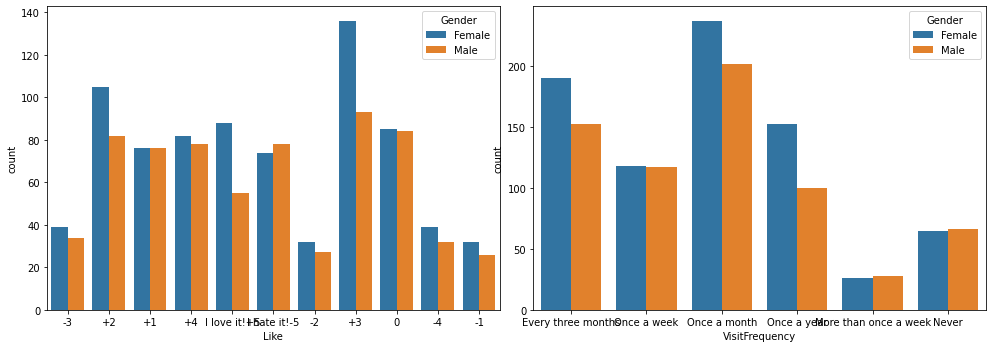

In [ ]:
n=0
plt.figure(1 , figsize = (14 , 5))
for i in  ['Like',	'VisitFrequency']:
  n+=1
  plt.subplot(1 , 2 , n)
  plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
  plt.tight_layout()
  sns.countplot(x=i,hue='Gender',data=data)
plt.show()
#Visit frequency of females are more than that of males

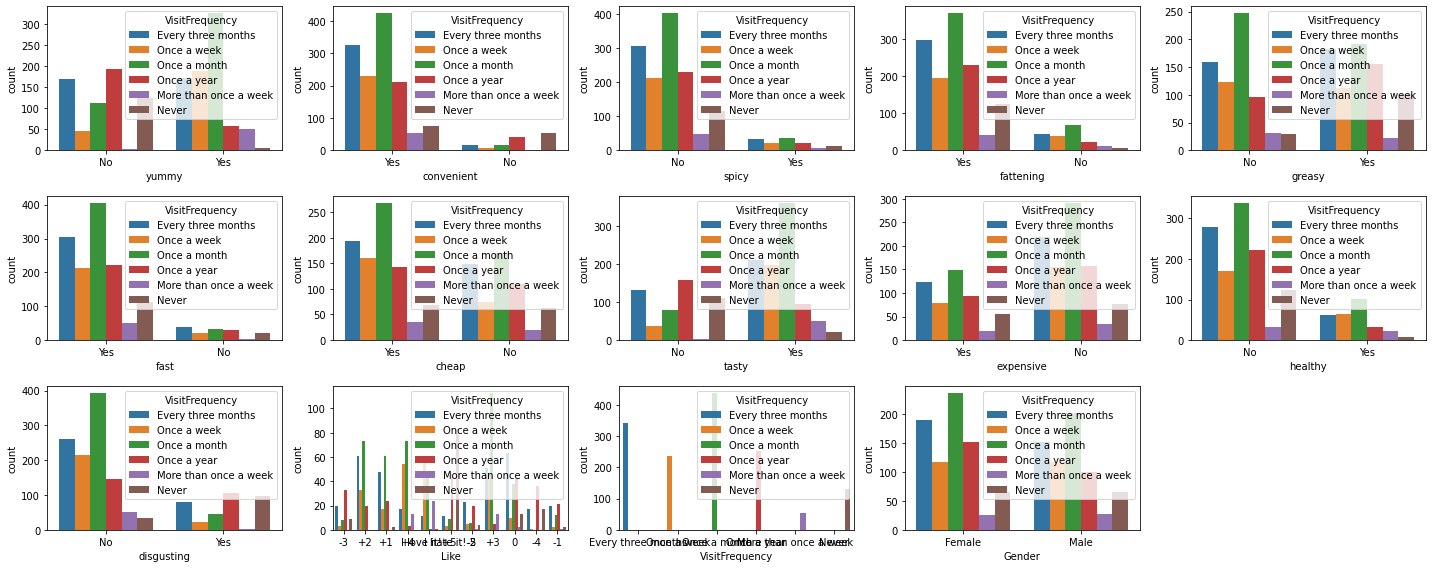

In [ ]:
# lets see if there is any trend with respect to visitFrequency in all the features
n=0
plt.figure(1 , figsize = (20 , 8))
for i in  ['yummy','convenient',	'spicy',	'fattening',	'greasy',	'fast',	'cheap',	'tasty',	'expensive',	'healthy'	,'disgusting','Like',	'VisitFrequency','Gender']:
  n+=1
  plt.subplot(3 , 5 , n)
  plt.subplots_adjust(hspace = 0.3 , wspace = 0.5)
  plt.tight_layout()
  sns.countplot(x=i,hue='VisitFrequency',data=data)
plt.show()


In [ ]:
data.info()
#No missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
# are there any features which are same
identical_features = {}
for i in data.columns:
  for j in data.columns:
     if (data[i].dtype==object)&(data[j].dtype==object):
       if np.all(data[i]==data[j])==True:
         identical_features[i]=j
print(f'identical_features:{identical_features}')         
#No identical columns
['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never']

In [ ]:
#array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
#       '0', '-4', '-1'], dtype=object)
#mapping values or label encoding them
for i in data.columns:
  if data[i].dtype==object:
    data[i]=data[i].map({'Yes':1,'No':0,'Male':1,'Female':0,'Never':0,'Once a year':1,'Every three months':2,'Once a month':3,'Once a week':4,'More than once a week':5,'I hate it!-5':0,'-4':1,'-3':2,'-2':3,'-1':4,'0':5,'+1':6,'+2':7,'+3':8,'+4':9,'I love it!+5':10})	    

In [ ]:
data.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,5.777013,44.604955,2.383345,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178,1.292987,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,57.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,71.000000,5.000000,1.000000


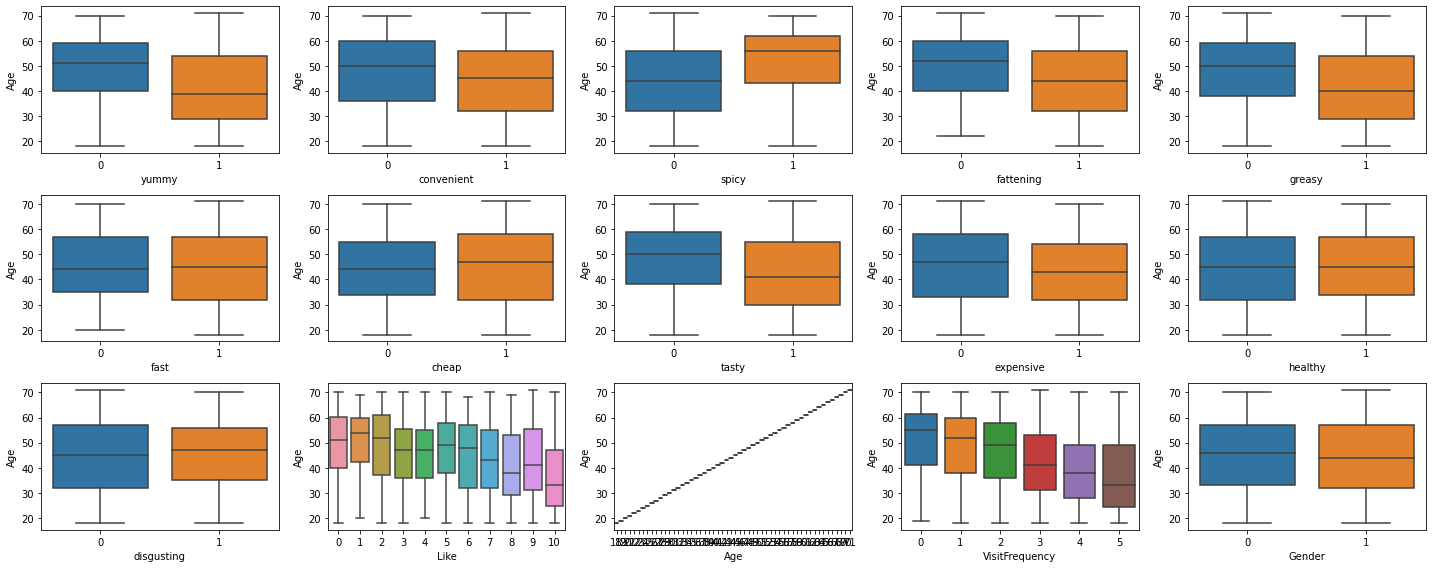

In [ ]:
n=0
plt.figure(1 , figsize = (20 , 8))
for i in data.columns:    #['yummy','convenient',	'spicy',	'fattening',	'greasy',	'fast',	'cheap',	'tasty',	'expensive',	'healthy'	,'disgusting','Like',	'VisitFrequency','Gender']:
  n+=1
  plt.subplot(3 , 5 , n)
  plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
  sns.boxplot(x=i,y='Age',data=data)
  plt.tight_layout()
plt.show()
# people in slightly younger age are more likely to find the food as yummy , convenient, fattening, Greasy,tasty,
# people in slightly old age are more likely to find the food as spicy
# visit frequency increases with decrease in age
# people in younger age are more likely to give higher rating than those of people in old age

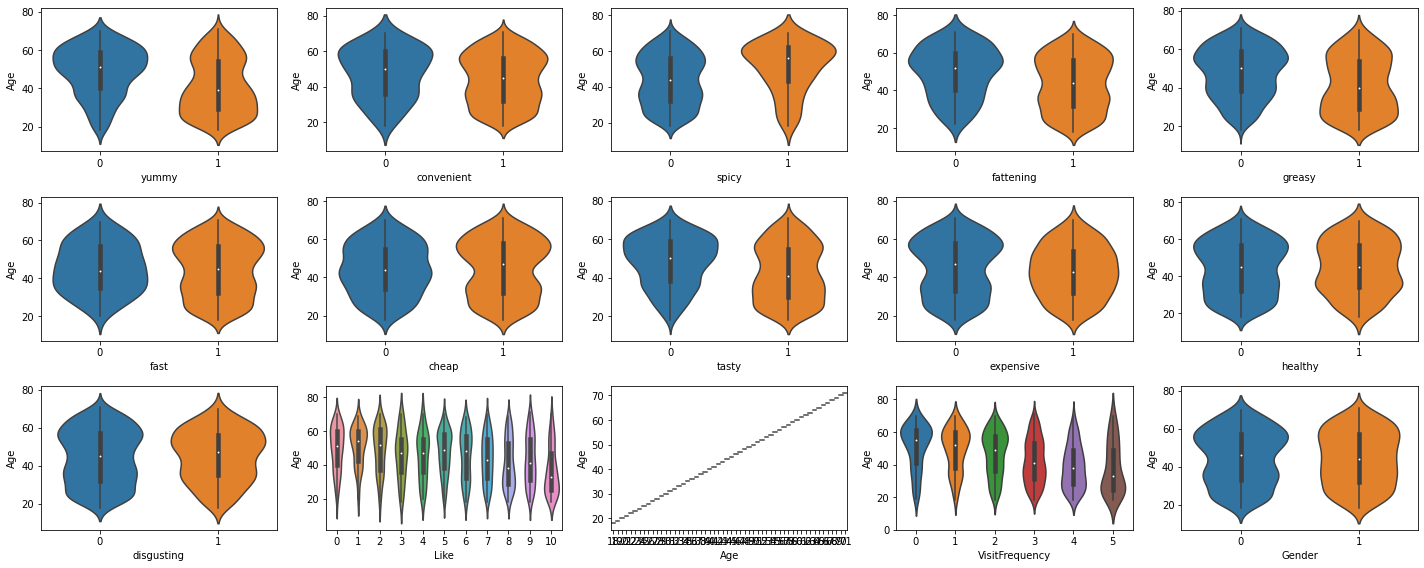

In [ ]:
# see violin plot to see distribution
n=0
plt.figure(1 , figsize = (20 , 8))
for i in data.columns:    #['yummy','convenient',	'spicy',	'fattening',	'greasy',	'fast',	'cheap',	'tasty',	'expensive',	'healthy'	,'disgusting','Like',	'VisitFrequency','Gender']:
  n+=1
  plt.subplot(3 , 5 , n)
  plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
  plt.tight_layout()
  sns.violinplot(x=i,y='Age',data=data)
  #sns.countplot(x=i,hue='VisitFrequency',data=data)
plt.show()

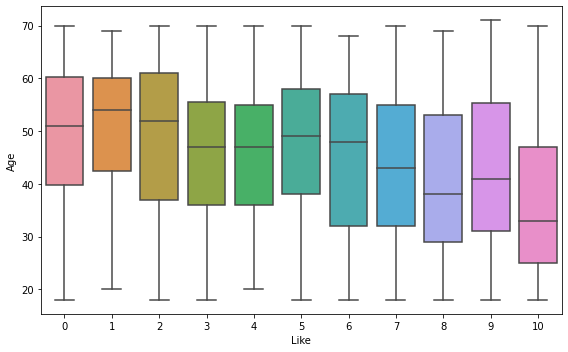

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Like',y='Age',data=data)
plt.tight_layout()
#sns.countplot(x=i,hue='VisitFrequency',data=data)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int64
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int64
 14  Gender          1453 non-null   int64
dtypes: int64(15)
memory usage: 170.4 KB


In [ ]:
data.to_numpy()

array([[ 0,  1,  0, ..., 61,  2,  0],
       [ 1,  1,  0, ..., 51,  2,  0],
       [ 0,  1,  1, ..., 62,  2,  0],
       ...,
       [ 1,  1,  0, ..., 52,  3,  0],
       [ 1,  1,  0, ..., 41,  2,  1],
       [ 0,  1,  0, ..., 30,  2,  1]])

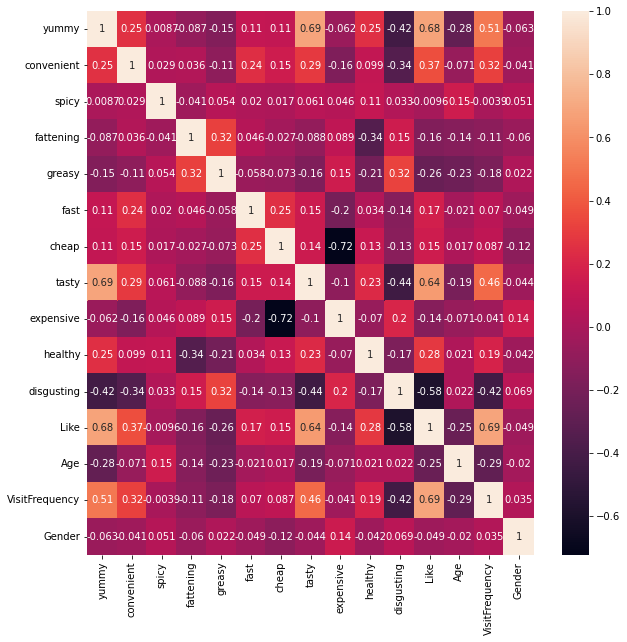

In [ ]:
data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
#preserving 95% varience
pca = PCA(n_components=0.95, random_state=42)
pca.fit(data.to_numpy())
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(data.to_numpy()), columns=PC_names)

In [ ]:
pca_data #PC1 and PC2 are preserving 95% varience

,PC1,PC2
0,-16.600875,2.694911
1,-6.307683,-1.512910
2,-17.354839,-1.186424
3,-24.101320,-5.039363
4,-4.303926,-1.526744
...,...,...
1448,-2.766707,5.929271
1449,8.702820,-1.222061
1450,-7.227816,-2.825460
1451,3.773127,-2.890670


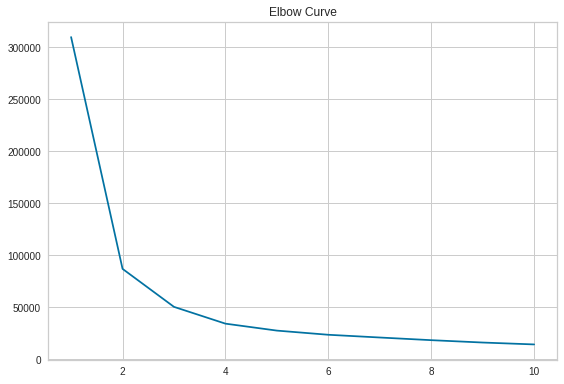

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
#from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.tight_layout()
plt.xlabel('K')
plt.ylabel('wcss')
plt.show()
#probable k-values are 2,3,4.

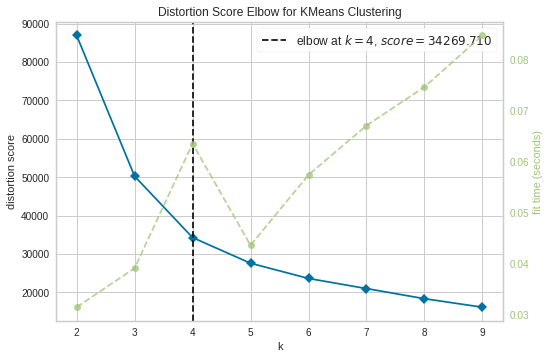

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
#from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(pca_data)       
distortion_visualizer.show()


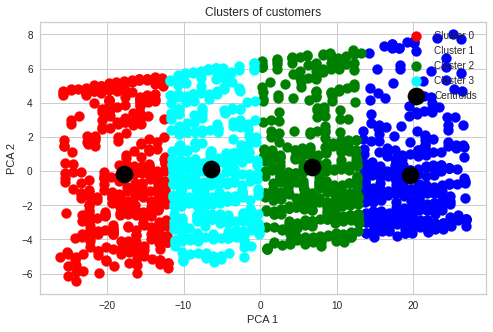

In [ ]:
pca_data
pca_data['cluster'] = y_kmeans
plt.figure(figsize=(8,5))
plt.scatter(pca_data[pca_data.cluster==0]['PC1'], pca_data[pca_data.cluster==0]['PC2'], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(pca_data[pca_data.cluster==1]['PC1'], pca_data[pca_data.cluster==1]['PC2'], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(pca_data[pca_data.cluster==2]['PC1'], pca_data[pca_data.cluster==2]['PC2'], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(pca_data[pca_data.cluster==3]['PC1'], pca_data[pca_data.cluster==3]['PC2'], s = 100, c = 'cyan', label = 'Cluster 3')
#plt.scatter(X_[y_kmeans == 4, 0], X_[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

#"0 : People belong to age group 60-70 who find food fast, fattening, non-spicy, and convenient"
#"1 : People belong to age group 20-30 who find food yummy,convenient, non-spicy, fattening, greasy, fast,tasty"
#"2 : People belong to age group 30-45 who find food yummy,convenient, non-spicy, fattening, fast"
#"3 : People belong to age group 45-55 who find food yummy,convenient, non-spicy, fattening, fast but also unhealty and disgusting"

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(pca_data)
y_kmeans,len(y_kmeans)
clusters=pd.concat([data, pd.DataFrame({'cluster':y_kmeans})], axis=1)
clusters.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,0
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,3
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,0
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,0
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,3


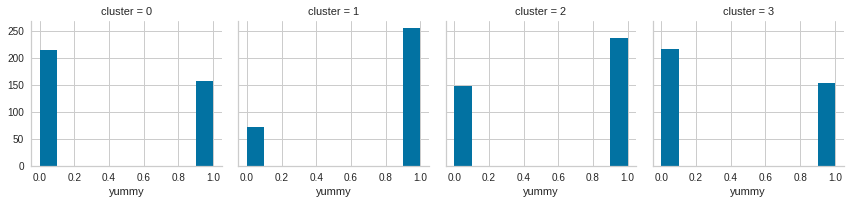

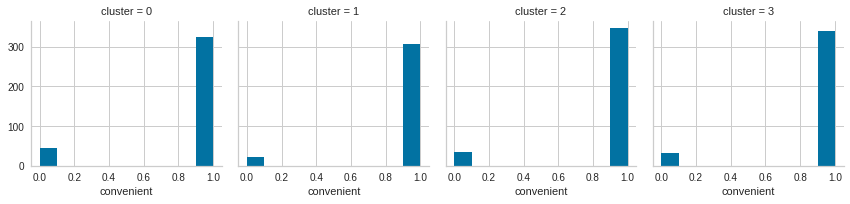

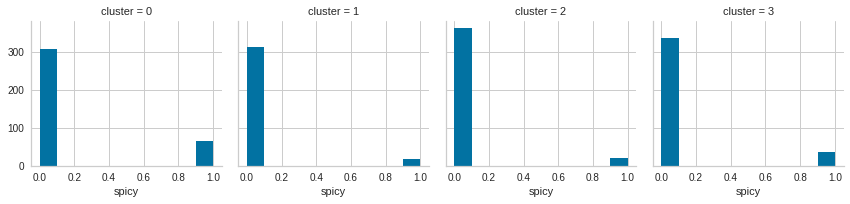

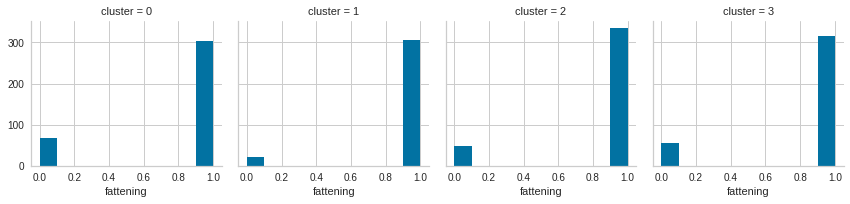

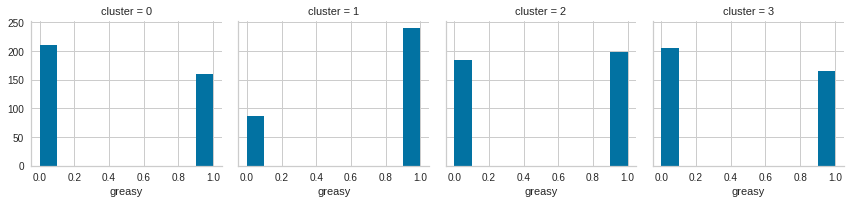

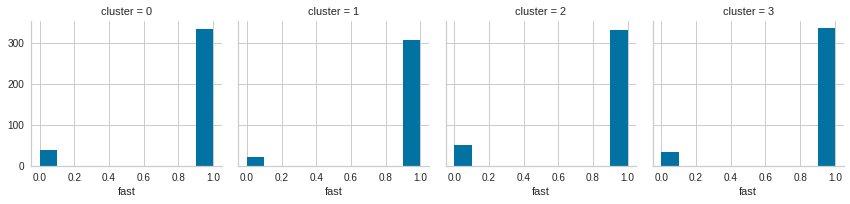

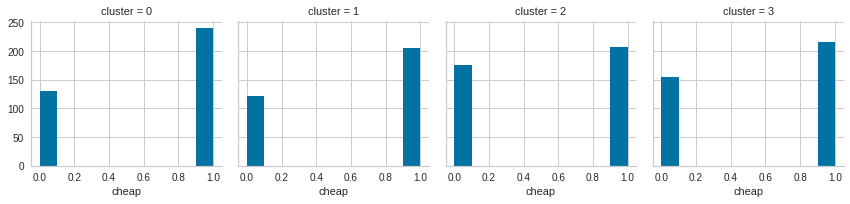

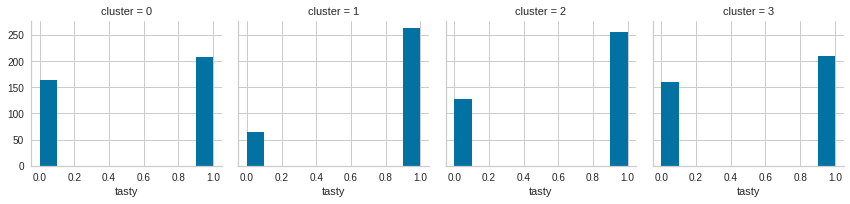

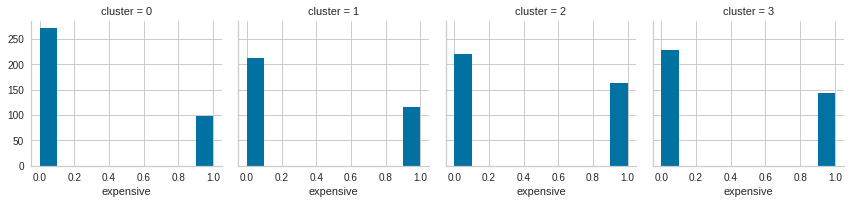

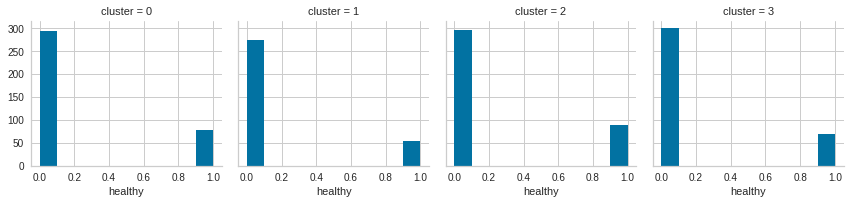

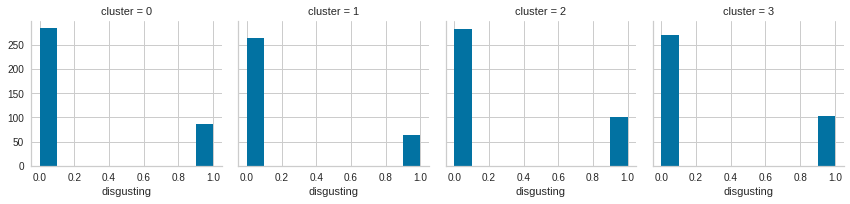

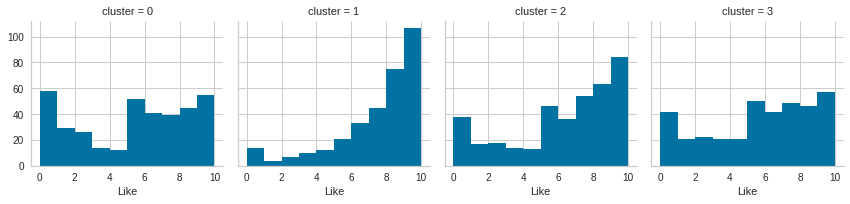

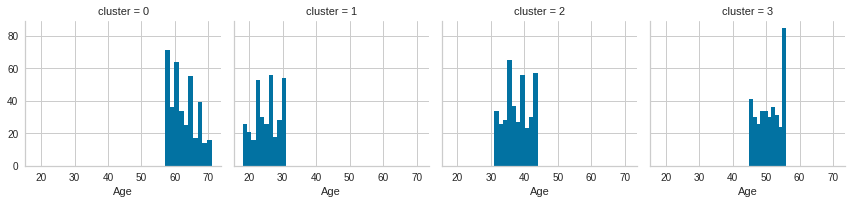

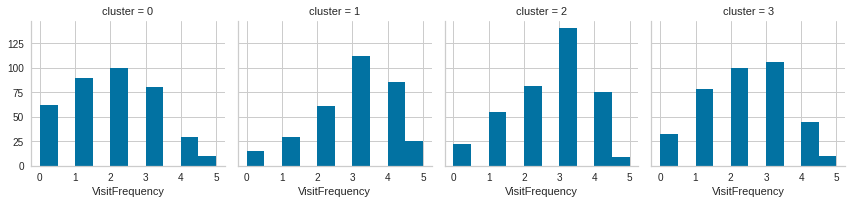

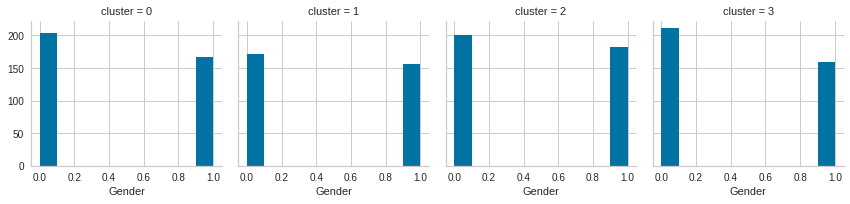

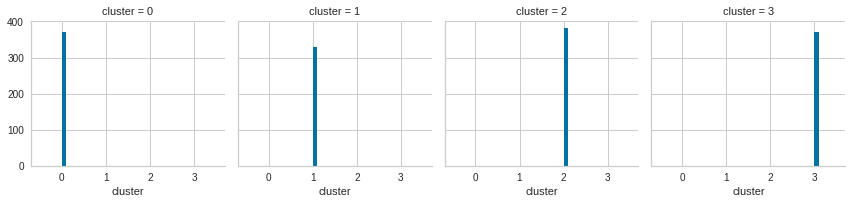

In [ ]:
#Lets interpret these clusters
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

#"0 : People belong to age group 60-70 who find food fast, fattening, non-spicy, and convenient"
#"1 : People belong to age group 20-30 who find food yummy,convenient, non-spicy, fattening, greasy, fast,tasty"
#"2 : People belong to age group 30-45 who find food yummy,convenient, non-spicy, fattening, fast"
#"3 : People belong to age group 45-55 who find food yummy,convenient, non-spicy, fattening, fast but also unhealty and disgusting"

# Describing the segments

No handles with labels found to put in legend.


<Figure size 720x1080 with 0 Axes>

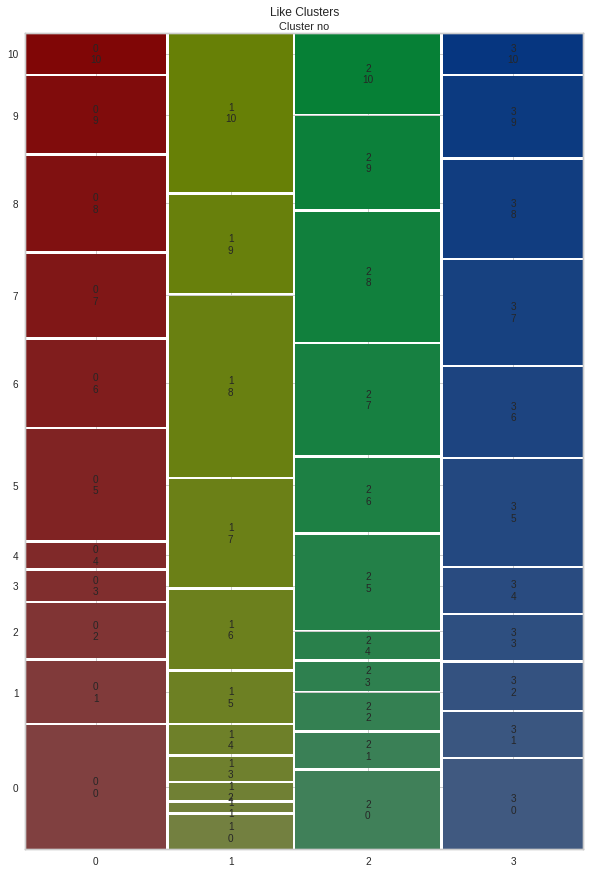

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
#for i in ['Age','VisitFrequency','Gender']:
crosstab =pd.crosstab(clusters['cluster'],clusters['Like'])
plt.rcParams['figure.figsize'] = (10,15)
plt.tight_layout()
mosaic(crosstab.stack())
plt.title('Like Clusters')
plt.xlabel('Cluster no')
plt.ylabel('Stacks')
plt.legend()
plt.show()
  

No handles with labels found to put in legend.


cluster  Gender
0        0         204
         1         167
1        0         172
         1         156
2        0         200
         1         183
3        0         212
         1         159
dtype: int64


<Figure size 504x360 with 0 Axes>

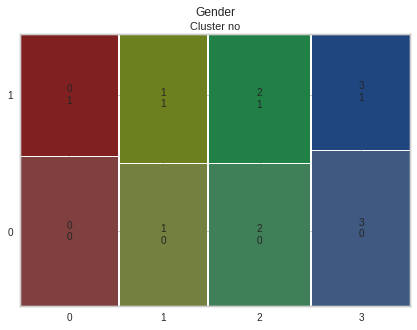

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
#for i in ['Age','VisitFrequency','Gender']:
crosstab =pd.crosstab(clusters['cluster'],clusters['Gender'])
plt.rcParams['figure.figsize'] = (7,5)
plt.tight_layout()
mosaic(crosstab.stack())
print(crosstab.stack())
plt.title('Gender')
plt.xlabel('Cluster no')
plt.ylabel('Stacks')
plt.legend()
plt.show()
  

cluster  VisitFrequency
0        0                  62
         1                  90
         2                 100
         3                  80
         4                  29
         5                  10
1        0                  15
         1                  29
         2                  61
         3                 112
         4                  86
         5                  25
2        0                  22
         1                  55
         2                  81
         3                 141
         4                  75
         5                   9
3        0                  32
         1                  78
         2                 100
         3                 106
         4                  45
         5                  10
dtype: int64


<Figure size 720x864 with 0 Axes>

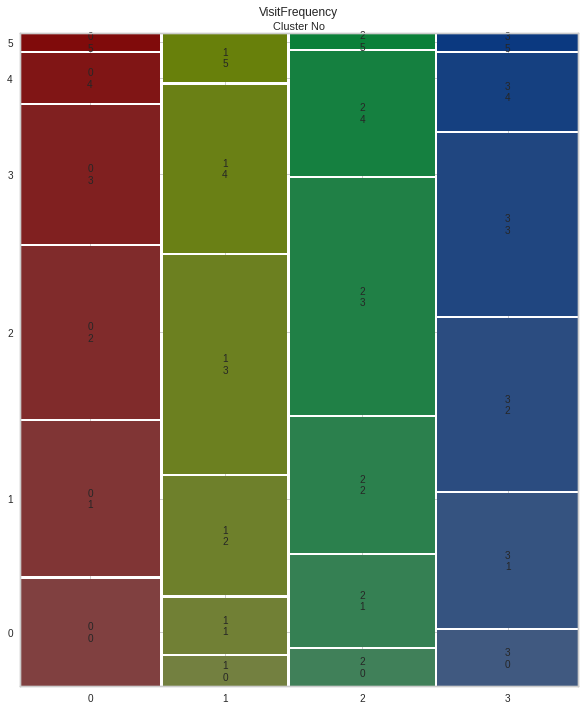

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
#for i in ['Age','VisitFrequency','Gender']:
crosstab =pd.crosstab(clusters['cluster'],clusters['VisitFrequency'])
plt.rcParams['figure.figsize'] = (10,12)
plt.tight_layout()
mosaic(crosstab.stack())
print(crosstab.stack())
plt.title('VisitFrequency')
plt.xlabel('Cluster No')
plt.ylabel('Stacks')
#plt.legend()
plt.show()
  

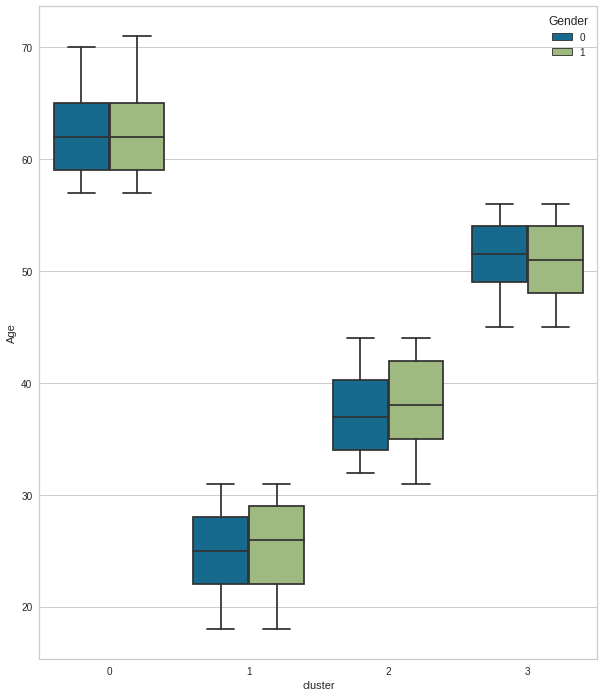

In [ ]:
#crosstab =pd.crosstab(clusters['cluster'],clusters['Age'])
#crosstab.T.boxplot()
sns.boxplot(x='cluster',y='Age',hue='Gender',data=clusters)
plt.show()

In [ ]:
df = clusters.groupby('cluster',as_index=True).agg('mean').loc[:,['Like','VisitFrequency','Gender']]
df

,Like,VisitFrequency,Gender
cluster,,,
0,4.916442,1.876011,0.450135
1,7.143293,2.914634,0.475610
2,5.926893,2.571802,0.477807
3,5.274933,2.226415,0.428571


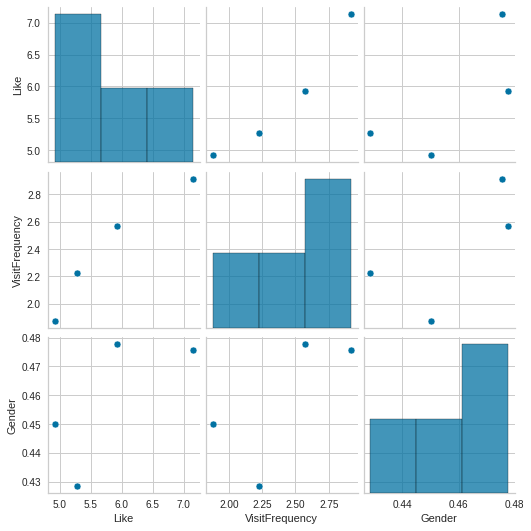

In [ ]:
sns.pairplot(df)